In [14]:
pip install -U memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random
import enum
import time
from memory_profiler import profile
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# Задание 1

Решить линейную регрессию — найти прямую, которая описывает зависимость

N - количество осей (размерность) <br>
M - количество точек <br>
minValue - минимальное значение для иксов <br>
maxValue - максимальное значение для иксов

In [16]:
N = 1
M = 30
minValue = 0
maxValue = 5
beta_1 = 0.9
beta_2 = 0.999
batch = random.randint(1, M)

class TypeOfOptimisation(enum.Enum):
    none = 0
    momentum = 1
    Nesterov = 2
    RMSProp = 3
    AdaGrad = 4
    Adam = 5

a = np.array([1, 2])
print(np.sqrt(a))

[1.         1.41421356]


In [17]:
def y_regression(B, X):
    return np.sum(X * B)


B_reg = []
for ind in range(N + 1):
    bi = random.randint(-maxValue, maxValue)
    B_reg.append(bi)
B_reg = np.array(B_reg, dtype='float64')
print(B_reg)
XM = []
YM = []
YR = []
for ind in range(M):
    X = [1]
    for j in range(N):
        X.append(ind)
    X = np.array(X)
    rand_delta = random.randint(-maxValue, maxValue)
    Y_act = y_regression(B_reg, X) + 0.5 * rand_delta
    YM.append(Y_act)
    XM.append(np.array(X))
XM = np.array(XM, dtype='float64')
YM = np.array(YM)

def runSGD(batch, typeOfOptimisation, withNormalization, lr, eps):
    B_start = np.array([0] * (N + 1), dtype='float64')
    YR = np.array([0] * M, dtype='float64')
    global calculations
    start = time.time()
    calculations = 0
    if withNormalization:
        X_norm = ZNormalization(XM)
        Y_norm = (YM - np.mean(YM)) / np.std(YM)
        BA_start = (B_reg - np.mean(B_reg)) / np.std(B_reg)
        BF_norm, \
        errors_norm, \
        YF_norm, \
        iterations = gradient_descent(batch,
                                      X_norm,
                                      Y_norm,
                                      YR,
                                      B_start,
                                      lr,
                                      eps,
                                      TypeOfOptimisation.none,
                                      with_normalization=True)
        print("batch:                   ", batch)
        print(errors_norm[0], errors_norm[len(errors_norm) - 1])
        print("actual coefficients:     ", BA_start)
        print("calculated coefficients: ", BF_norm)
        print("number of iterations:    ", iterations)
        print("number of calculations: ", calculations)
        print("execution time: ", (time.time() - start) * 1000, "ms")
        print()
        drawGraph(X_norm, Y_norm, YF_norm, batch, withNormalization, typeOfOptimisation)
        draw_errors_graphic(errors_norm, iterations, batch, withNormalization, typeOfOptimisation)
    else:
        B_final, \
        errors, \
        YF, \
        iterations = gradient_descent(batch,
                                      XM,
                                      YM,
                                      YR,
                                      B_start,
                                      lr,
                                      eps,
                                      typeOfOptimisation,
                                      with_normalization=False)
        print("batch:                   ", batch)
        print(errors[0], errors[len(errors) - 1])
        print("actual coefficients:     ", B_reg)
        print("calculated coefficients: ", B_final)
        print("number of iterations:    ", iterations)
        print("number of calculations: ", calculations)
        print("execution time: ", (time.time() - start) * 1000, "ms")
        print()
        drawGraph(XM, YM, YF, batch, withNormalization, typeOfOptimisation)
        draw_errors_graphic(errors, iterations, batch, withNormalization, typeOfOptimisation)


[ 5. -4.]


batch:                    1
44.245816666666656 2.540820228989806
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-0.1044292  -3.66821884]
number of iterations:     93
number of calculations:  188
execution time:  14.000177383422852 ms



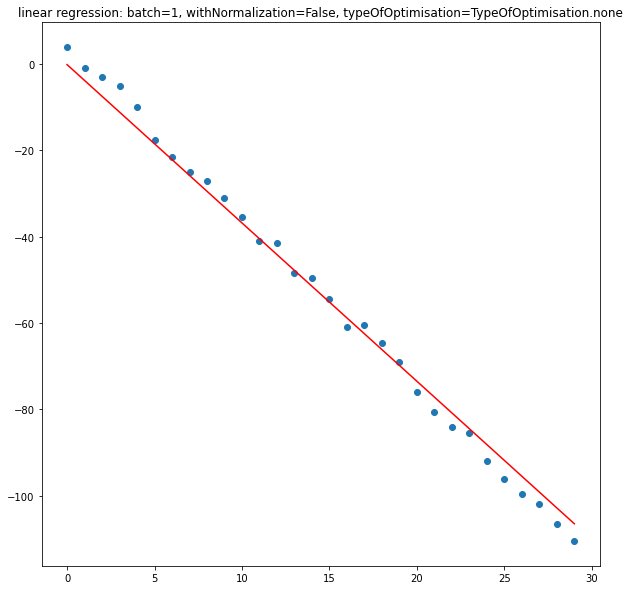

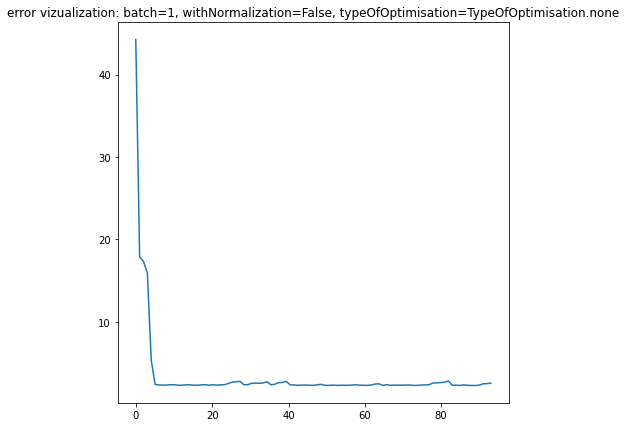

peak memory: 124.62 MiB, increment: 4.66 MiB
batch:                    15.0
163.52433333333332 5.128138739921861e+22
actual coefficients:      [ 5. -4.]
calculated coefficients:  [1.55082199e+20 3.52595208e+21]
number of iterations:     42
number of calculations:  1287
execution time:  14.02735710144043 ms



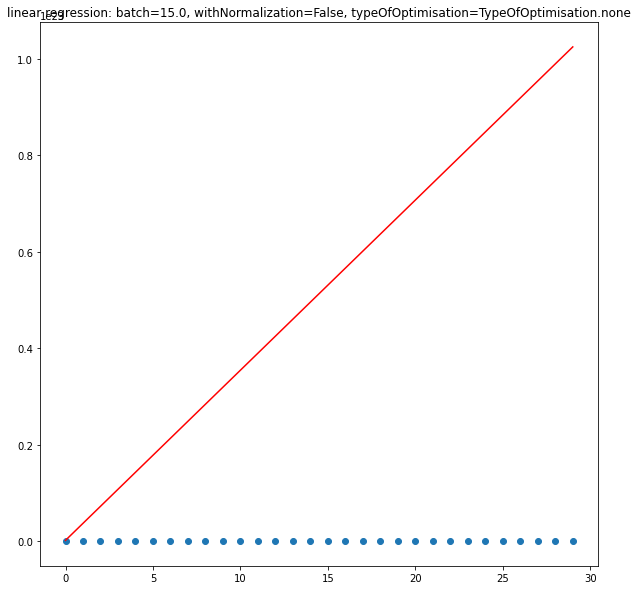

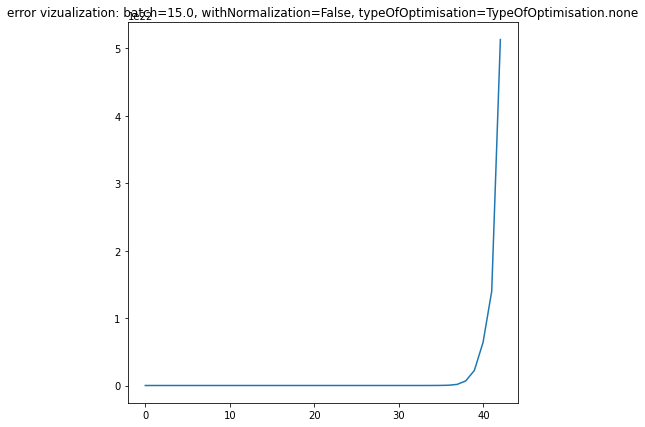

peak memory: 122.13 MiB, increment: 3.43 MiB
batch:                    30
412.8705833333334 6.969679924673738e+22
actual coefficients:      [ 5. -4.]
calculated coefficients:  [2.43776390e+20 4.78986365e+21]
number of iterations:     24
number of calculations:  1489
execution time:  8.963584899902344 ms



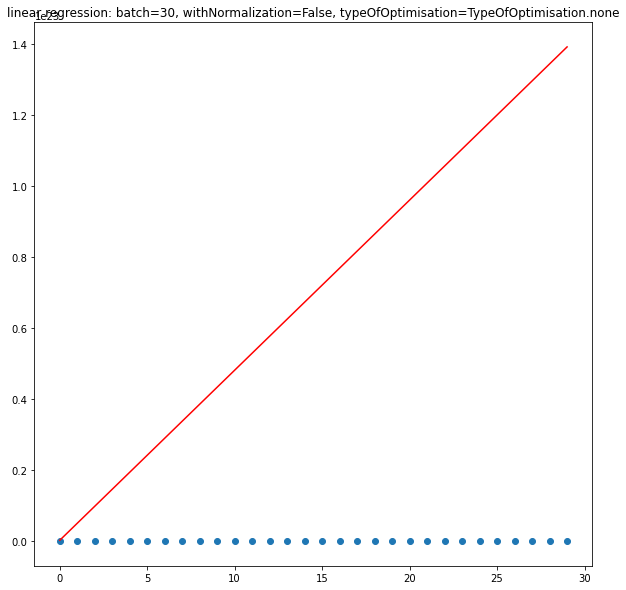

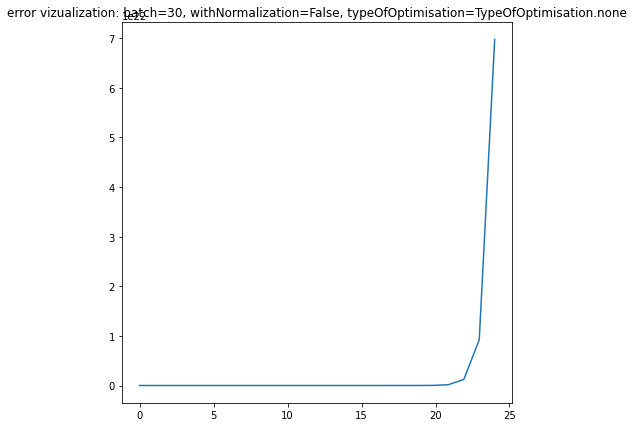

peak memory: 122.80 MiB, increment: 3.62 MiB


In [18]:
def mean_error(Y_act, Y_reg):
    return np.sum(abs(Y_act - Y_reg)) / M


def stopping_criteria(previous, current, eps):
    return abs(previous - current) < eps


def gradient(nums, XM, YR, YM):
    global calculations
    grad = []
    for i in range(N + 1):
        xi = 0
        for k in range(len(nums)):
            xi += XM[nums[k]][i] * (YR[nums[k]] - YM[nums[k]])
            calculations = calculations + 1
            if xi > 1e25:
                return np.array([0] * (N + 1), dtype='float64')
        grad.append(xi)
    return np.array(grad)

def gradient_descent(batch, XM, YM, YR, B_reg, lr, eps, type_of_optimisation, with_normalization):
    # a = [0] * 100000000
    previous_error = 0
    grad = np.array([0] * (N + 1), dtype='float64')
    previous_gradient = np.array([0] * (N + 1), dtype='float64')
    m_adam = np.array([0] * (N + 1), dtype='float64')
    v_adam = np.array([0] * (N + 1), dtype='float64')
    errors = []
    iterations = 0
    global calculations
    while True:
        nums = set()
        while len(nums) != batch:
            x = random.randint(0, M - 1)
            if x not in nums:
                nums.add(x)
        nums = np.array(list(nums))

        # :NOTE: optimisations
        if type_of_optimisation == TypeOfOptimisation.none:
            grad = gradient(nums, XM, YR, YM)
        elif type_of_optimisation == TypeOfOptimisation.momentum:
            grad = gradient(nums, XM, YR, YM)
            grad += gamma * previous_gradient
            calculations = calculations + 1
        elif type_of_optimisation == TypeOfOptimisation.Nesterov:
            B_prev = B_reg - lr * previous_gradient
            YR_new = [0] * M
            for i in range(M):
                YR_new[i] = y_regression(B_prev, XM[i])
            grad = gradient(nums, XM, np.array(YR_new), YM)
            grad += gamma * previous_gradient
            calculations = calculations + 2 + M
        elif type_of_optimisation == TypeOfOptimisation.AdaGrad:
            grad = gradient(nums, XM, YR, YM)
            new_grad = previous_gradient + np.square(grad)
            new_grad = np.divide(grad, np.sqrt(abs(new_grad + eps)))
            grad = new_grad
            calculations = calculations + 2
        elif type_of_optimisation == TypeOfOptimisation.RMSProp:
            grad = gradient(nums, XM, YR, YM)
            new_grad = gamma * previous_gradient + (1 - gamma) * np.square(grad)
            new_grad = np.divide(grad, np.sqrt(abs(new_grad + eps)))
            grad = new_grad
            calculations = calculations + 2
        elif type_of_optimisation == TypeOfOptimisation.Adam:
            grad = gradient(nums, XM, YR, YM)
            m_adam = beta_1 * m_adam + (1 - beta_1) * grad
            v_adam = beta_2 * v_adam + (1 - beta_2) * np.square(grad)
            m = m_adam / (1 - beta_1)
            v = v_adam / (1 - beta_2)
            grad = m / np.sqrt(abs(v + eps))
            calculations = calculations + 5
        B_reg -= lr * grad

        for i in range(M):
            YR[i] = y_regression(B_reg, XM[i])
        if stopping_criteria(previous_error, mean_error(YM, YR), eps):
            break
        previous_error = mean_error(YM, YR)
        previous_gradient = grad
        errors.append(previous_error)
        iterations += 1
    return B_reg, errors, YR, iterations


def drawGraph(XM, YM, YF, batch, withNormalization, typeOfOptimisation):
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    X = XM.T[1]
    plt.scatter(X, YM)
    plt.plot(X, YF, color='red')
    title = 'linear regression: batch=' + str(batch) + \
            ', withNormalization=' + str(withNormalization) + \
            ', typeOfOptimisation=' + str(typeOfOptimisation)
    plt.title(title)
    plt.show()


def draw_errors_graphic(E, iterations, batch, withNormalization, typeOfOptimisation):
    fig = plt.figure()
    fig.set_size_inches(7, 7)
    i = np.linspace(0, iterations, iterations)
    plt.plot(i, E)
    title = 'error vizualization: batch=' + str(batch) + \
            ', withNormalization=' + str(withNormalization) + \
            ', typeOfOptimisation=' + str(typeOfOptimisation)
    plt.title(title)
    plt.show()

%memit runSGD(1, TypeOfOptimisation.none, withNormalization=False, lr=1e-3, eps=1e-3)
%memit runSGD(M / 2, TypeOfOptimisation.none, withNormalization=False, lr=1e-3, eps=1e-3)
%memit runSGD(M, TypeOfOptimisation.none, withNormalization=False, lr=1e-3, eps=1e-3)

# Задание 2

batch:                    1
0.8456866200029893 0.3929822023993622
actual coefficients:      [ 1. -1.]
calculated coefficients:  [ 0.0429002  -0.54307621]
number of iterations:     68
number of calculations:  138
execution time:  11.001348495483398 ms



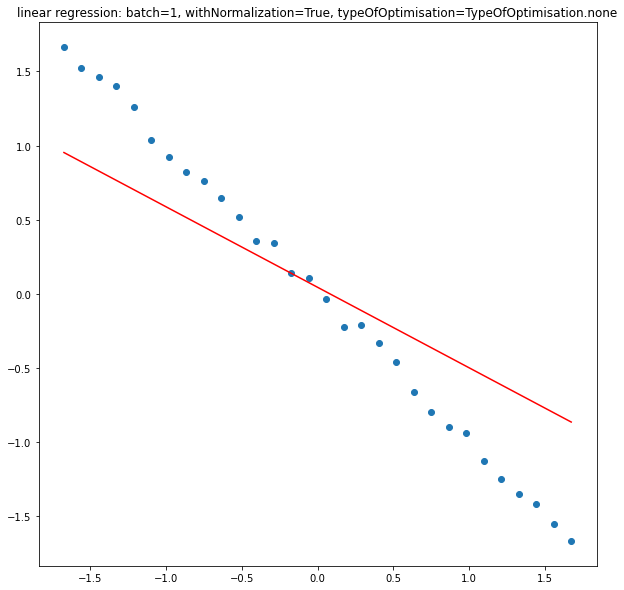

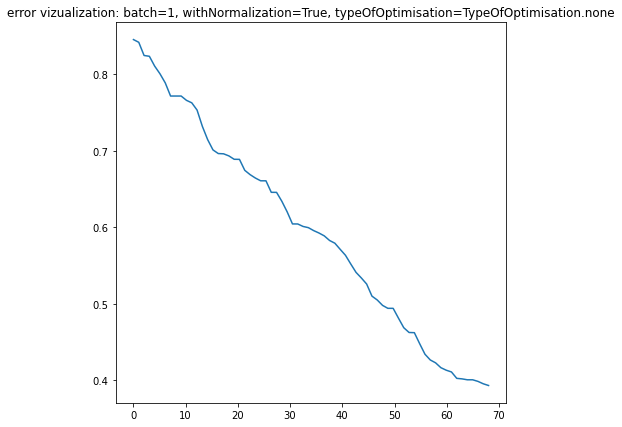

peak memory: 122.74 MiB, increment: 3.90 MiB
batch:                    15.0
0.7434423262488706 0.03704228827142957
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-0.00460919 -0.99807311]
number of iterations:     226
number of calculations:  6810
execution time:  42.03605651855469 ms



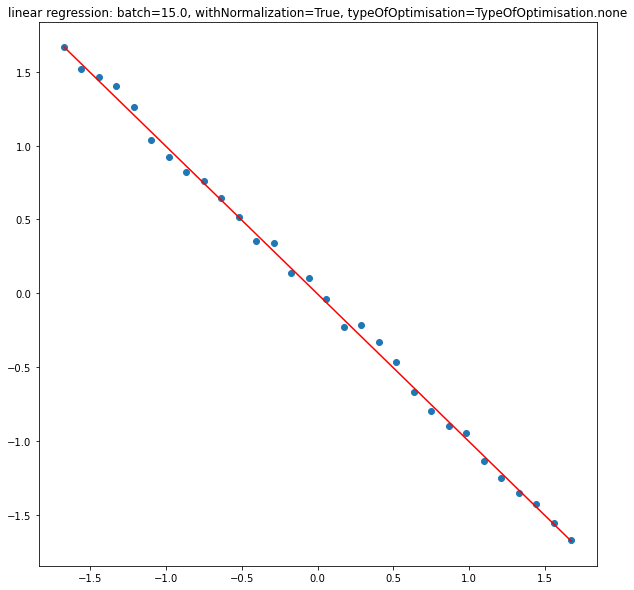

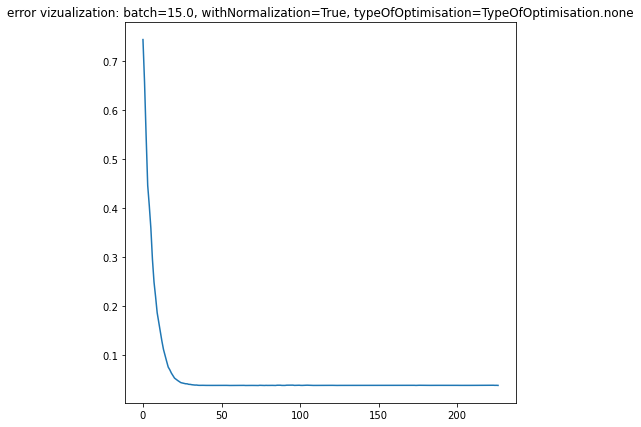

peak memory: 122.79 MiB, increment: 4.05 MiB
batch:                    30
0.6037780649787113 0.037088860334855235
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-8.27116153e-17 -9.99067133e-01]
number of iterations:     29
number of calculations:  1800
execution time:  10.03265380859375 ms



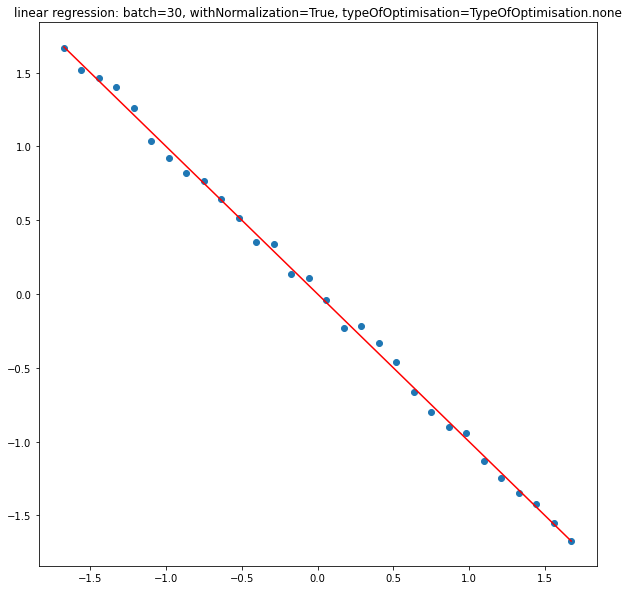

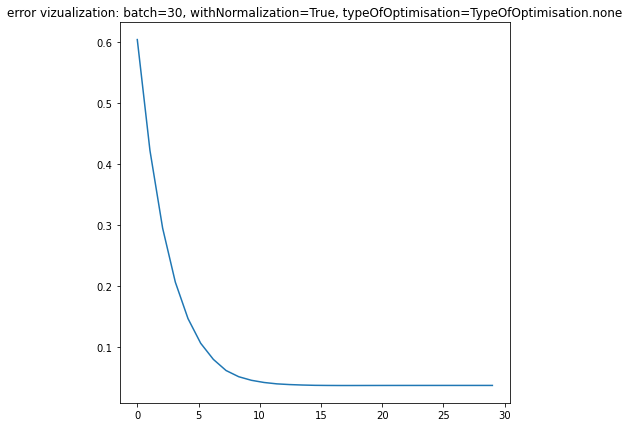

batch:                    30
0.6037780649787113 0.037088860334855235
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-8.27116153e-17 -9.99067133e-01]
number of iterations:     29
number of calculations:  1800
execution time:  9.037494659423828 ms



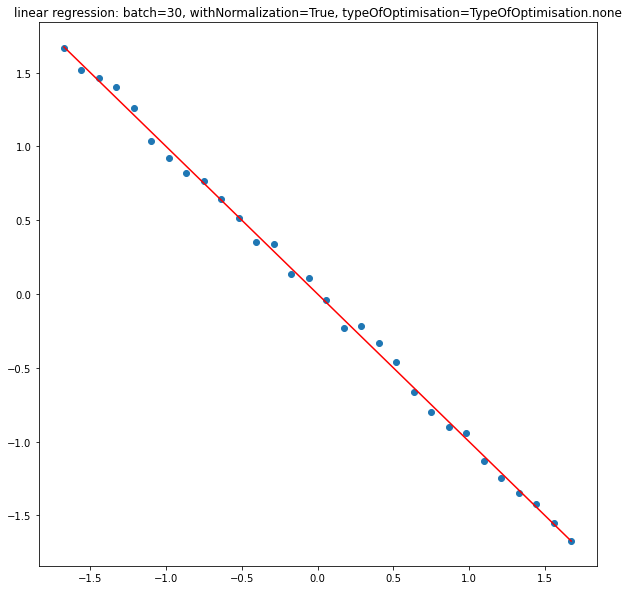

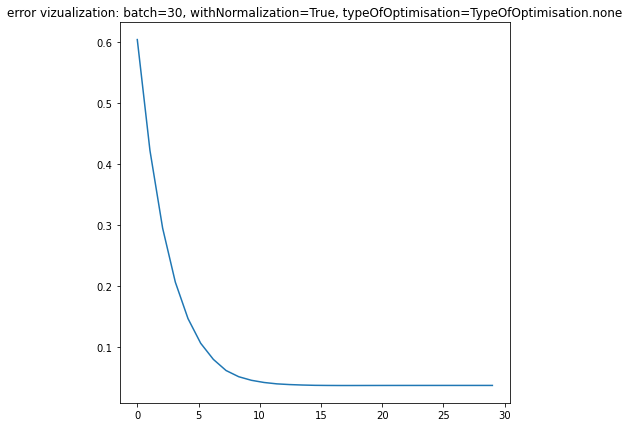

peak memory: 127.84 MiB, increment: 9.11 MiB


In [19]:
def ZNormalization(XM):
    X = XM.T
    for i in range(1, N + 1):
        X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])
    return X.T


# print(XM)
%memit runSGD(1, TypeOfOptimisation.none, withNormalization=True, lr=1e-2, eps=1e-6)
%memit runSGD(M / 2, TypeOfOptimisation.none, withNormalization=True, lr=1e-2, eps=1e-6)
%memit runSGD(M, TypeOfOptimisation.none, withNormalization=True, lr=1e-2, eps=1e-6)

# Задание 3

### Метод моментов

Смысл заключается в том, что мы на каждом шаге прибавляем к значению градиента
предыдущий градиент умноженный на константу. Это позволяет градиентному спуску не застревать
в локальных минимумах.

batch:                    1
47.95690025954765 1.943079493346488
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-53.38591427 -32.57980951]
number of iterations:     1594
number of calculations:  4785
execution time:  233.0005168914795 ms



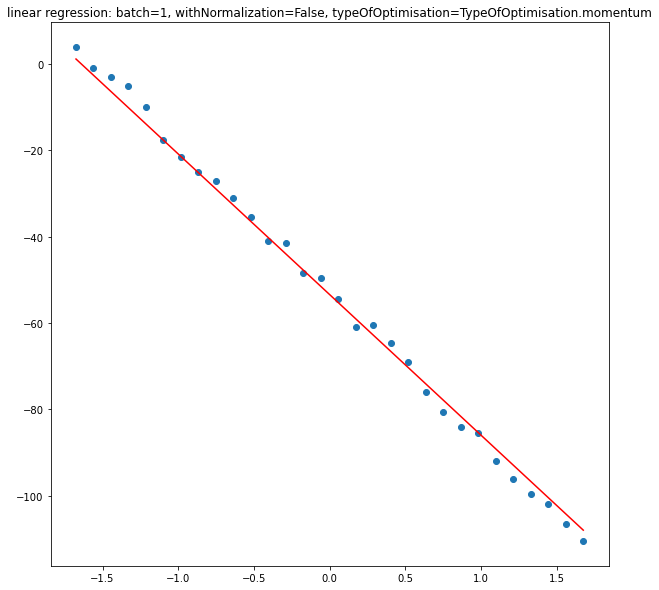

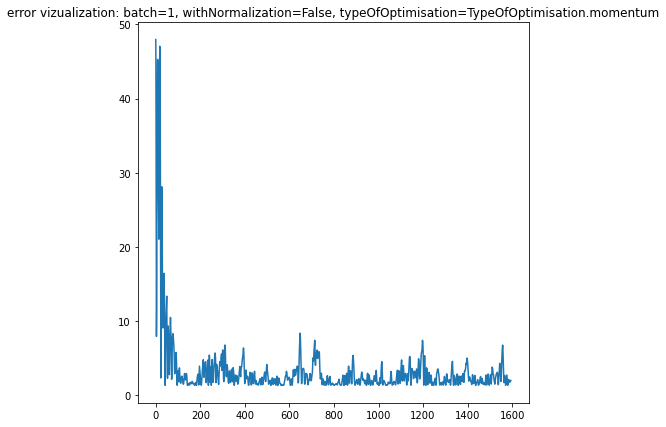

peak memory: 123.77 MiB, increment: 5.12 MiB
batch:                    15.0
25.18333333333334 1.2930267774784387
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-52.91547158 -34.26298323]
number of iterations:     11077
number of calculations:  343418
execution time:  2182.960033416748 ms



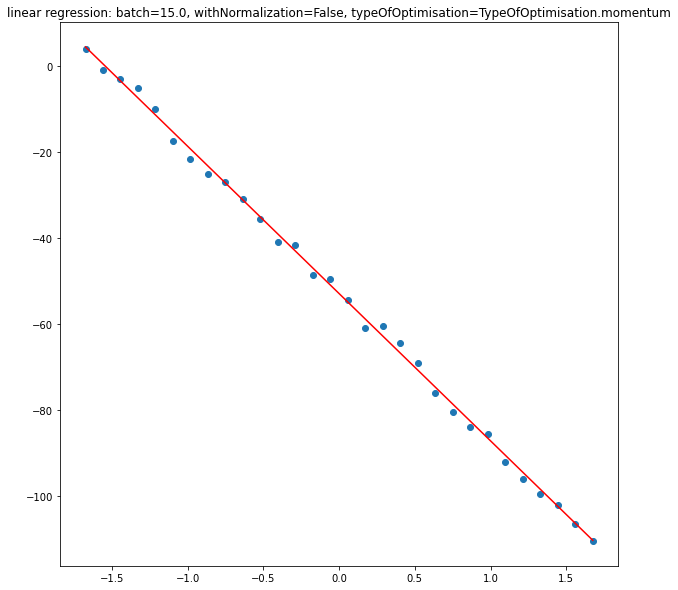

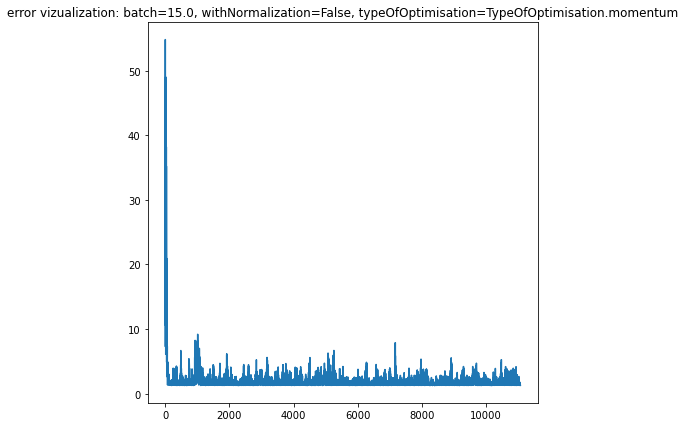

peak memory: 125.64 MiB, increment: 7.23 MiB
batch:                    30
107.04989247311828 1.2730486050075205
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-53.1692006  -34.28835056]
number of iterations:     187
number of calculations:  11468
execution time:  54.99577522277832 ms



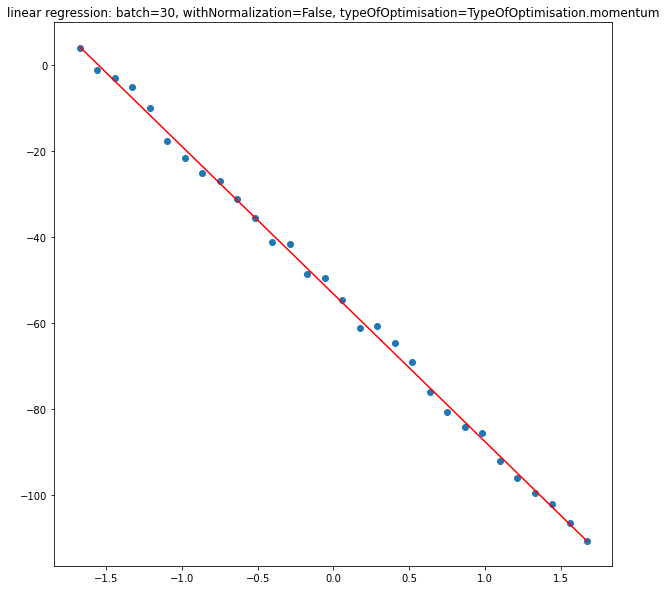

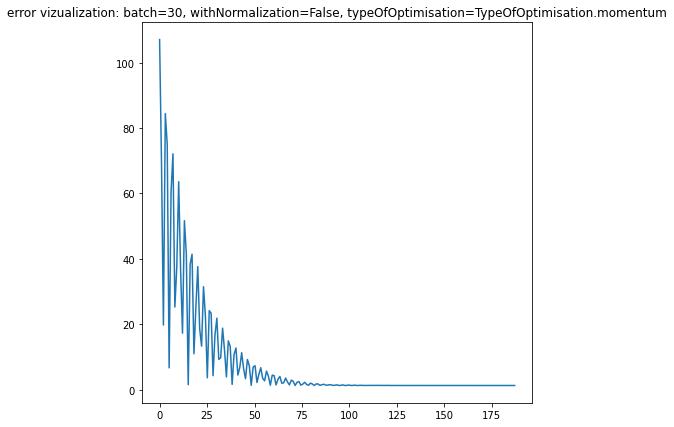

peak memory: 122.89 MiB, increment: 4.30 MiB
batch:                    1
0.8403020147897086 0.03829072904363962
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-0.00977709 -0.99012294]
number of iterations:     594
number of calculations:  1190
execution time:  83.05215835571289 ms



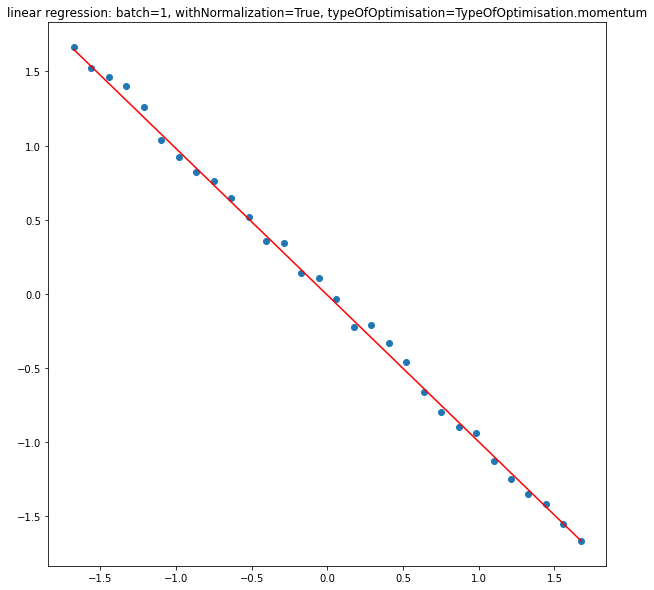

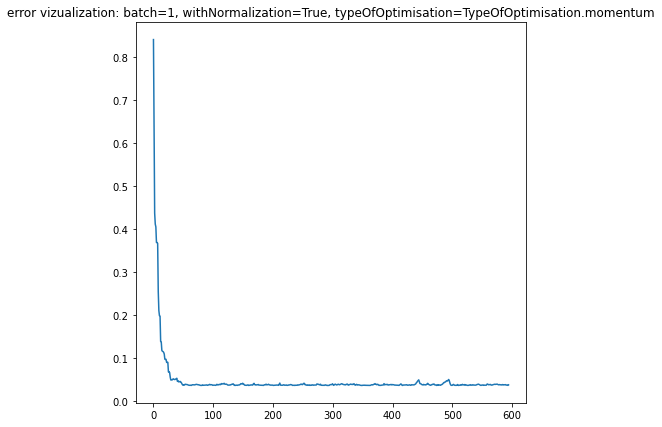

peak memory: 122.99 MiB, increment: 4.34 MiB
batch:                    15.0
0.3569559732885298 0.04013590010541078
actual coefficients:      [ 1. -1.]
calculated coefficients:  [ 9.15286625e-04 -9.84168388e-01]
number of iterations:     437
number of calculations:  13140
execution time:  86.01570129394531 ms



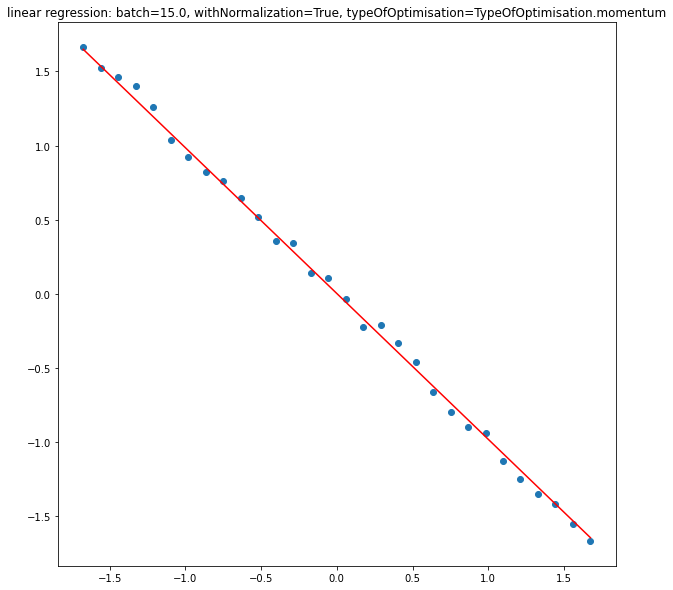

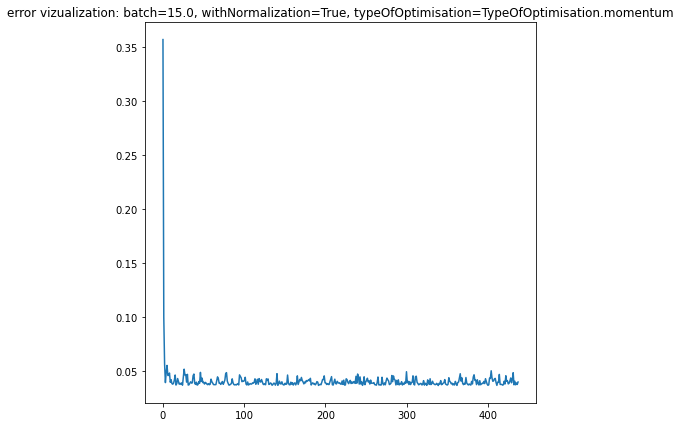

peak memory: 123.19 MiB, increment: 4.34 MiB
batch:                    30
1.7336608258088781 1.0465889729053906e+24
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-3.31577837e+09  1.20782528e+24]
number of iterations:     80
number of calculations:  4834
execution time:  23.99897575378418 ms



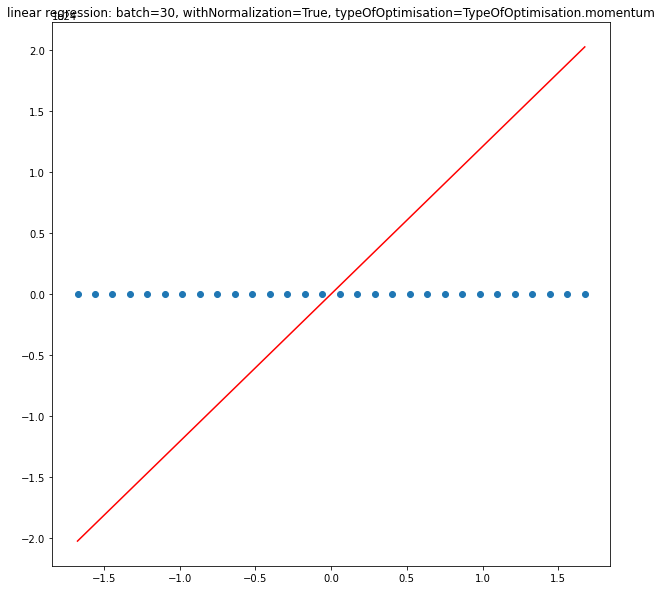

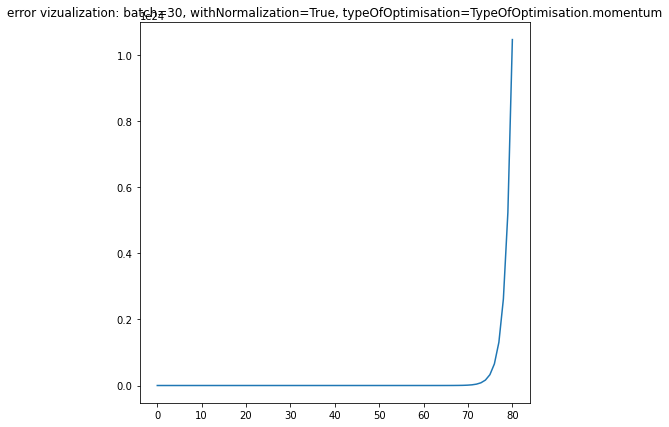

peak memory: 123.02 MiB, increment: 4.33 MiB


In [20]:
gamma = 0.9

%memit runSGD(1, TypeOfOptimisation.momentum, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M / 2, TypeOfOptimisation.momentum, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M, TypeOfOptimisation.momentum, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(1, TypeOfOptimisation.momentum, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M / 2, TypeOfOptimisation.momentum, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M, TypeOfOptimisation.momentum, withNormalization=True, lr=1e-1, eps=1e-6)

### Метод Нестерова

Здесь используется тот же смысл, как и в методе моментов, только градиент мы считаем не от текущей точки,
а от следующей (как бы заглядывая вперед). Дает более быструю сходимость, чем метод моментов.

batch:                    1
44.61666666666667 1.3539667664539607
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-53.83474579 -33.96948704]
number of iterations:     2846
number of calculations:  96798
execution time:  796.0019111633301 ms



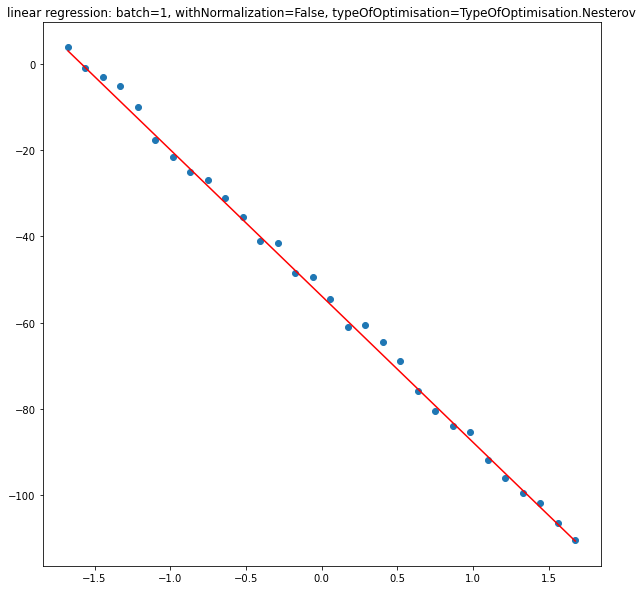

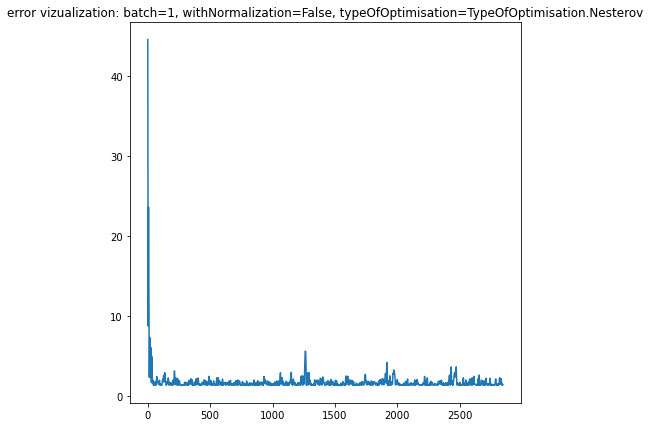

peak memory: 123.34 MiB, increment: 4.54 MiB
batch:                    15.0
22.533333333333335 4.6608783346978654e+24
actual coefficients:      [ 5. -4.]
calculated coefficients:  [4.46478136e+24 3.46227314e+24]
number of iterations:     442
number of calculations:  20337
execution time:  132.99942016601562 ms



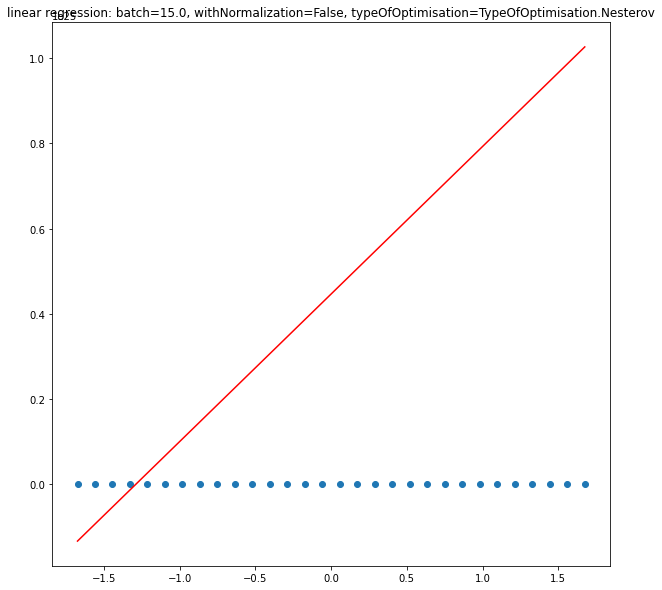

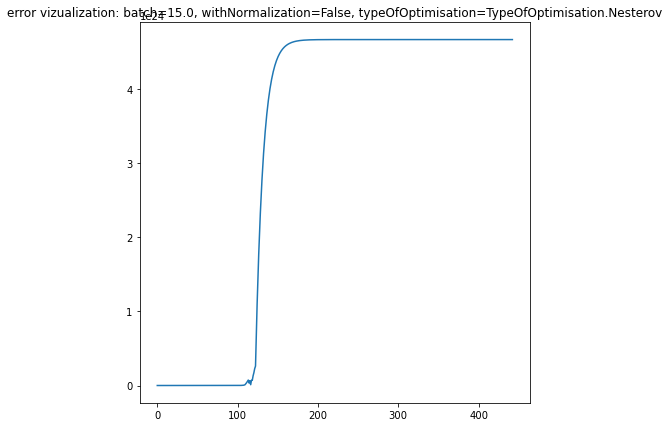

peak memory: 122.88 MiB, increment: 3.93 MiB
batch:                    30
107.04989247311828 7.997124467470436e+24
actual coefficients:      [ 5. -4.]
calculated coefficients:  [7.95143194e+24 5.12780863e+24]
number of iterations:     358
number of calculations:  16167
execution time:  136.98911666870117 ms



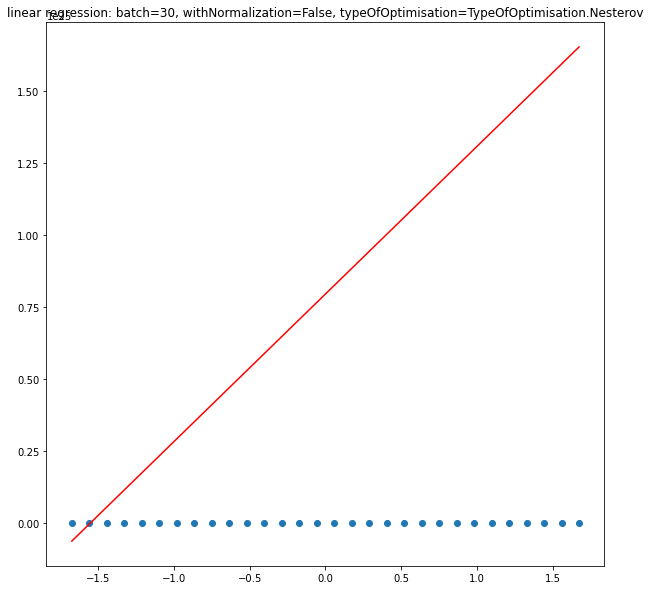

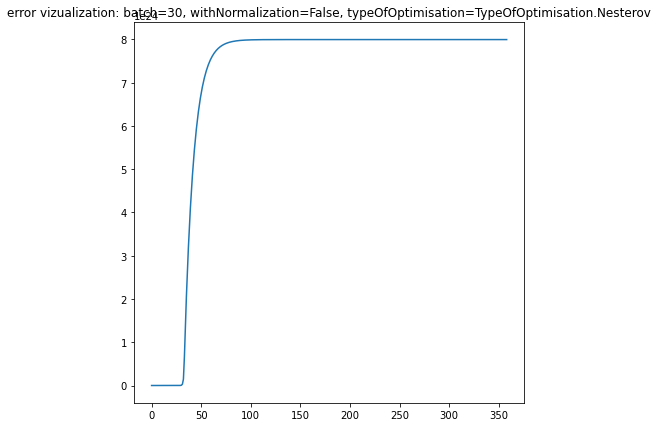

peak memory: 122.86 MiB, increment: 4.36 MiB
batch:                    1
0.8018683315292265 0.0370489378130313
actual coefficients:      [ 1. -1.]
calculated coefficients:  [ 6.32700280e-04 -9.98562572e-01]
number of iterations:     513
number of calculations:  1028
execution time:  101.00126266479492 ms



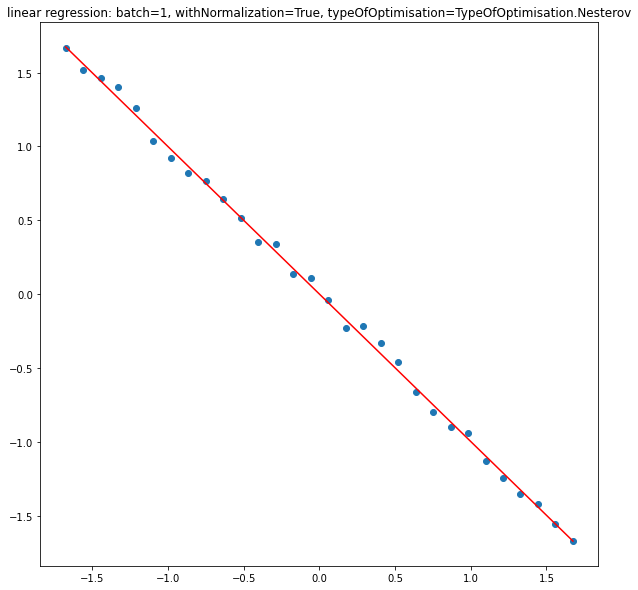

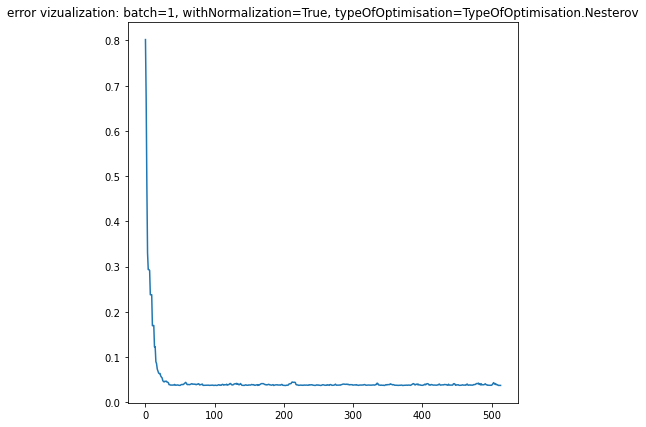

peak memory: 122.87 MiB, increment: 4.08 MiB
batch:                    15.0
0.8807104764644366 0.03748269491611289
actual coefficients:      [ 1. -1.]
calculated coefficients:  [ 0.00312306 -0.99567689]
number of iterations:     1816
number of calculations:  54510
execution time:  403.0344486236572 ms



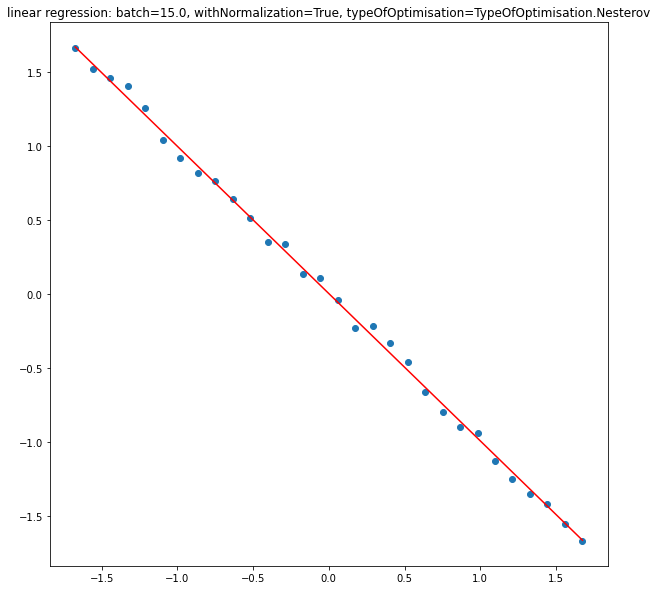

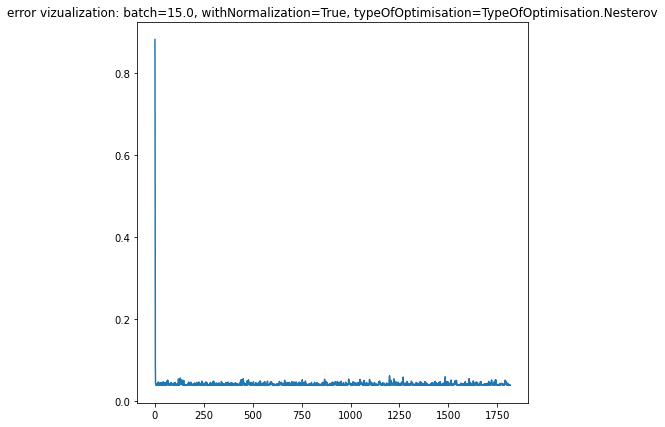

peak memory: 123.12 MiB, increment: 4.57 MiB
batch:                    30
1.7336608258088781 1.0465889729053872e+24
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-3.20332985e+09  1.20782528e+24]
number of iterations:     80
number of calculations:  4834
execution time:  25.036096572875977 ms



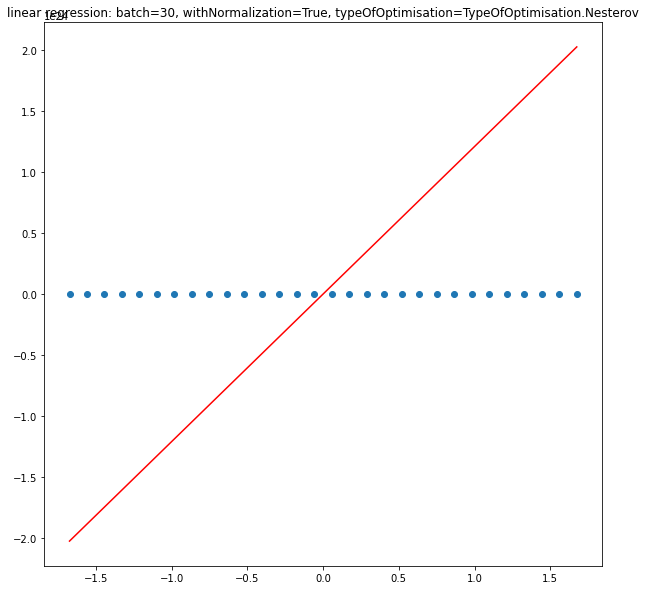

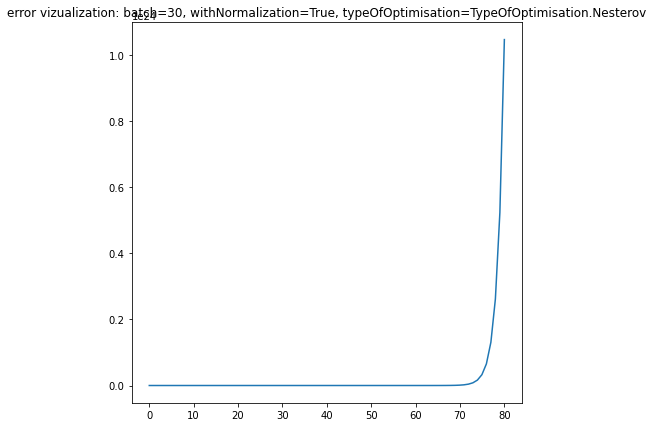

peak memory: 123.00 MiB, increment: 4.02 MiB


In [21]:
%memit runSGD(1, TypeOfOptimisation.Nesterov, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M / 2, TypeOfOptimisation.Nesterov, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M, TypeOfOptimisation.Nesterov, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(1, TypeOfOptimisation.Nesterov, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M / 2, TypeOfOptimisation.Nesterov, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M, TypeOfOptimisation.Nesterov, withNormalization=True, lr=1e-1, eps=1e-6)

### AdaGrad

batch:                    1
53.32883168932662 21.838757250961397
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-35.72507147 -13.99054733]
number of iterations:     492
number of calculations:  1972
execution time:  87.98623085021973 ms



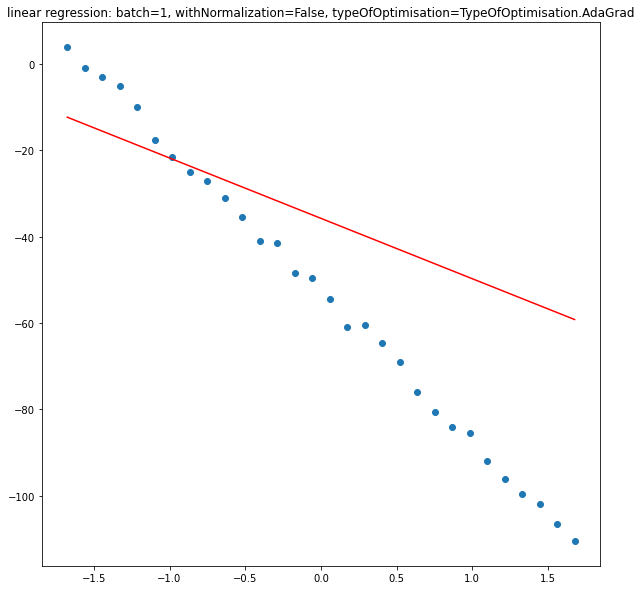

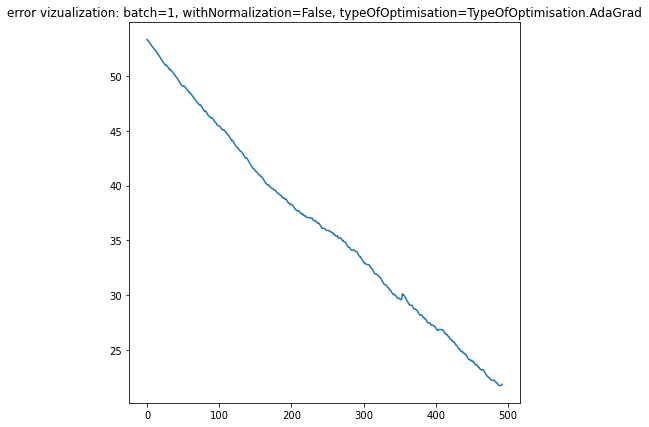

peak memory: 124.13 MiB, increment: 5.21 MiB
batch:                    15.0
53.328831688461015 1.303620037615914
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-52.97191228 -34.127981  ]
number of iterations:     1061
number of calculations:  33984
execution time:  238.0349636077881 ms



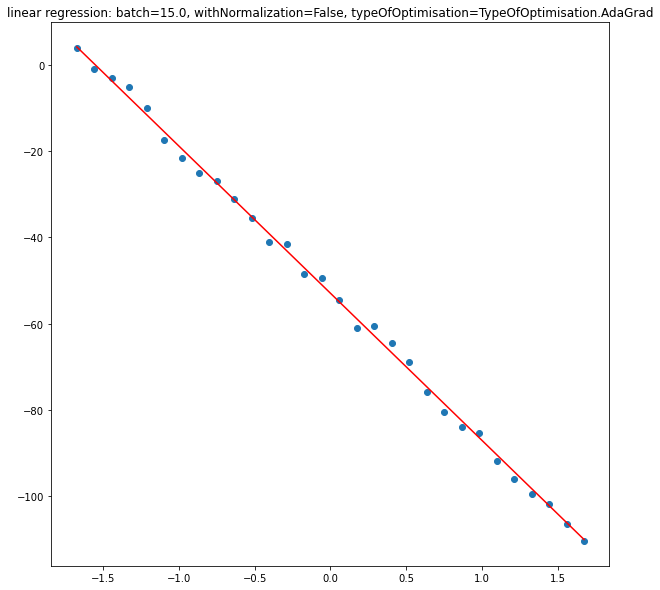

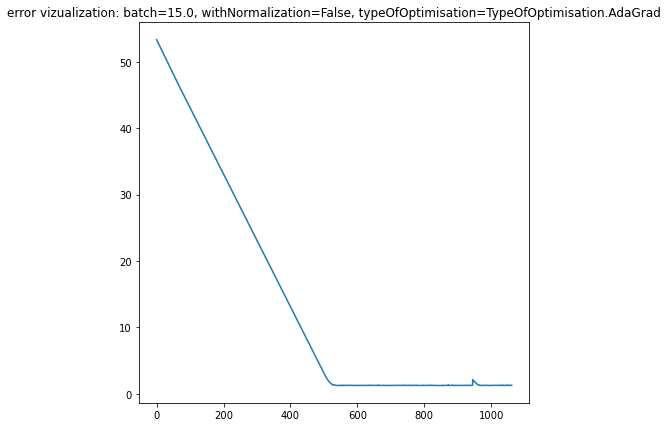

peak memory: 122.84 MiB, increment: 3.95 MiB
batch:                    30
53.32883168845605 1.2729289510490347
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-53.11199014 -34.28604653]
number of iterations:     826
number of calculations:  51274
execution time:  290.03095626831055 ms



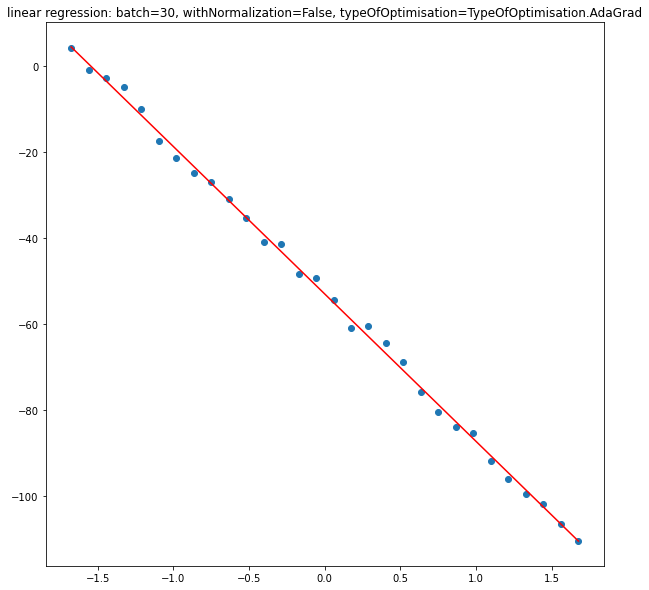

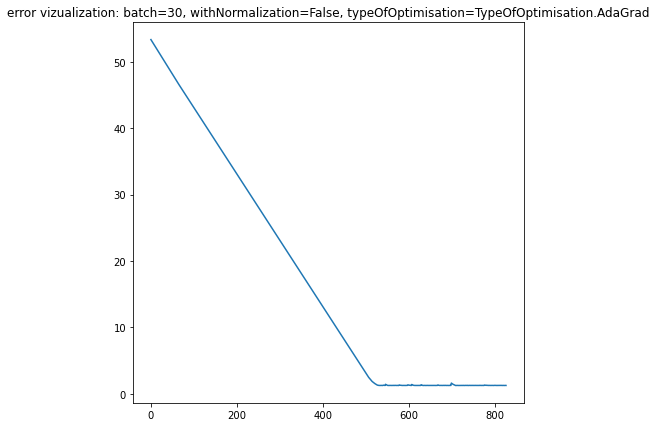

peak memory: 124.01 MiB, increment: 5.32 MiB
batch:                    1
0.8581453566702865 0.037573601020180765
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-0.00752521 -1.00503904]
number of iterations:     312
number of calculations:  626
execution time:  46.00787162780762 ms



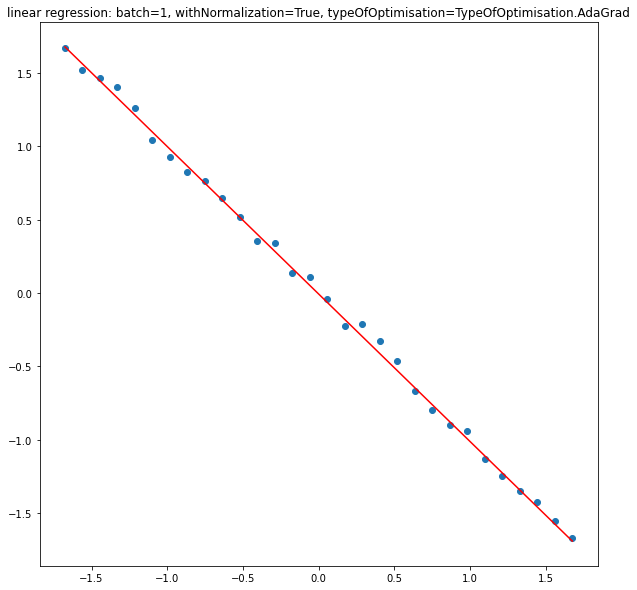

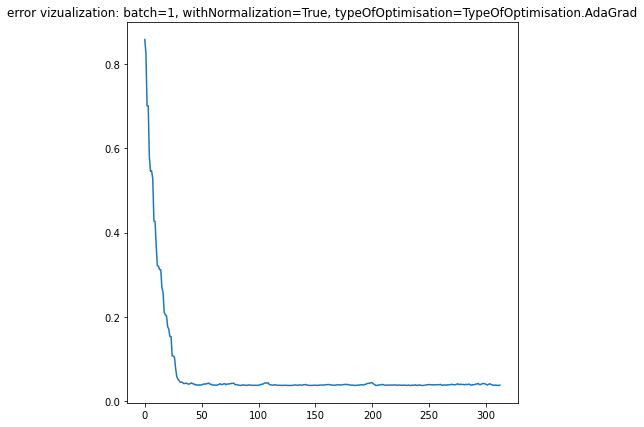

peak memory: 122.68 MiB, increment: 3.92 MiB
batch:                    15.0
0.6285529932589853 0.03727898962581079
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-0.00617804 -1.00091937]
number of iterations:     8292
number of calculations:  248790
execution time:  1707.9994678497314 ms



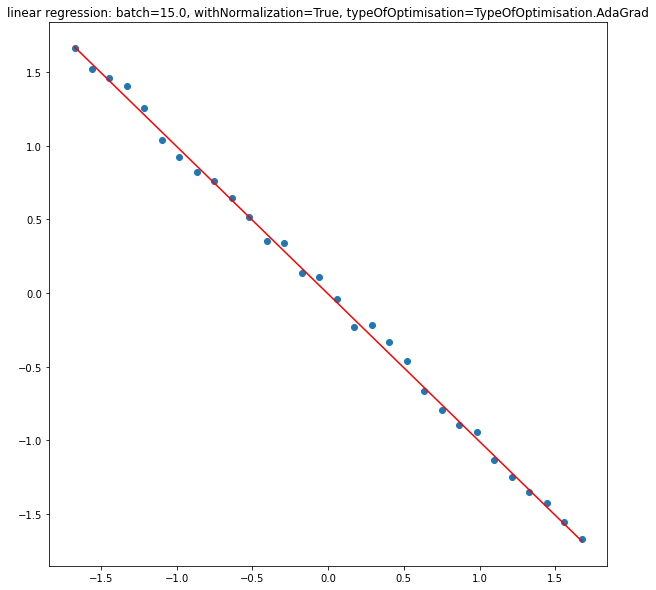

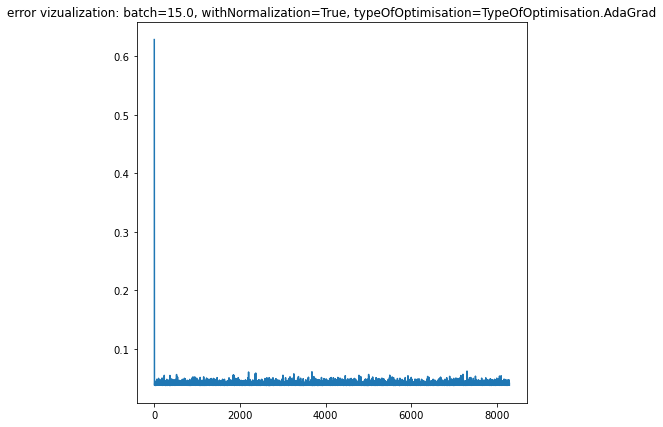

peak memory: 122.53 MiB, increment: 3.71 MiB
batch:                    30
1.7336608258088781 1.0465889729053853e+24
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-3.26596471e+09  1.20782528e+24]
number of iterations:     80
number of calculations:  4834
execution time:  24.03545379638672 ms



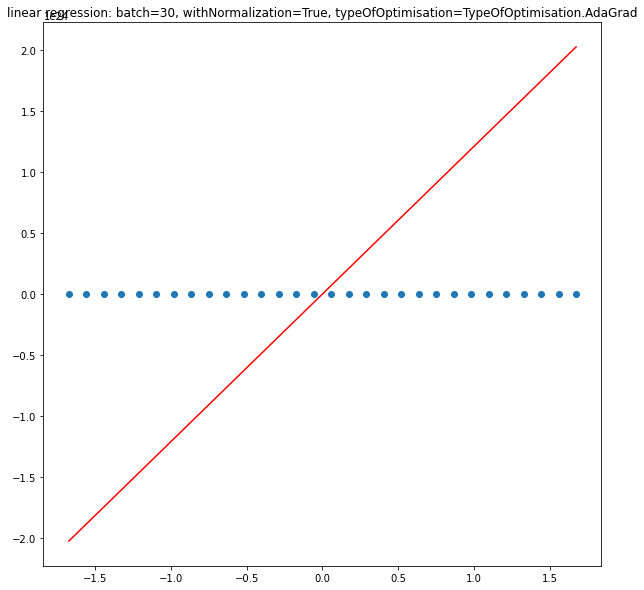

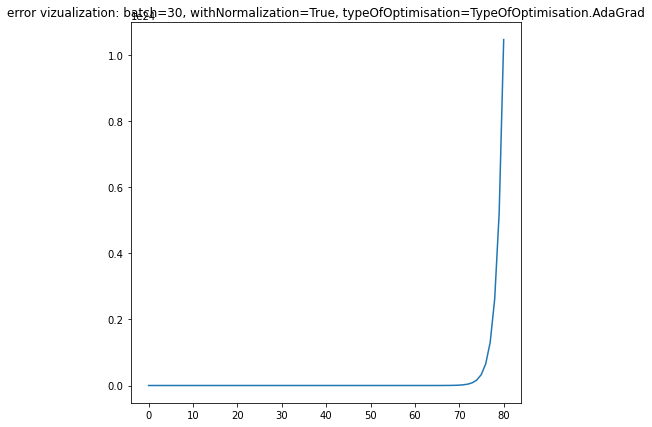

peak memory: 122.98 MiB, increment: 3.73 MiB


In [22]:
%memit runSGD(1, TypeOfOptimisation.AdaGrad, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M / 2, TypeOfOptimisation.AdaGrad, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M, TypeOfOptimisation.AdaGrad, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(1, TypeOfOptimisation.AdaGrad, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M / 2, TypeOfOptimisation.AdaGrad, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M, TypeOfOptimisation.AdaGrad, withNormalization=True, lr=1e-1, eps=1e-6)

### RMSProp

without normalization: 
batch:                    1
53.10287013219593 22.154301429219874
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-33.51498559 -15.9308302 ]
number of iterations:     140
number of calculations:  564
execution time:  20.998477935791016 ms



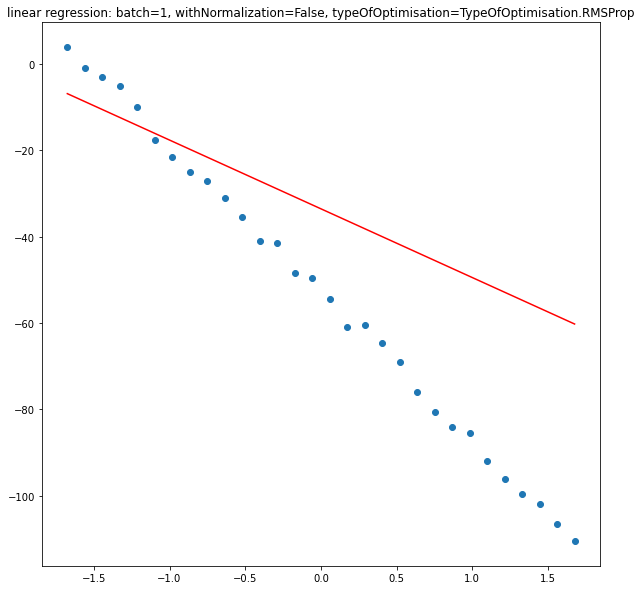

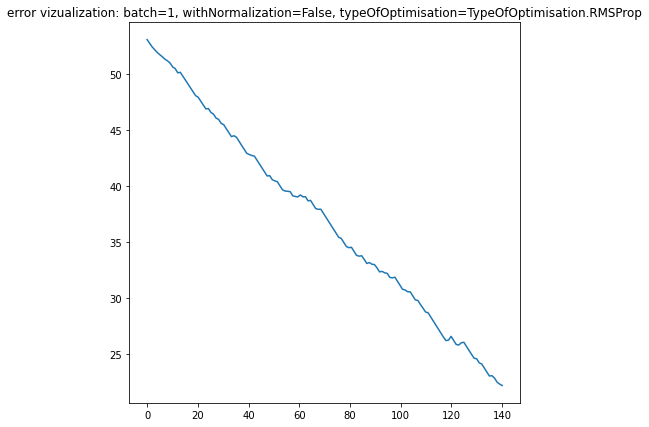

peak memory: 122.57 MiB, increment: 3.91 MiB
batch:                    15.0
53.1028701164686 1.2804365427360642
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-53.36894532 -34.37911375]
number of iterations:     330
number of calculations:  10592
execution time:  65.99879264831543 ms



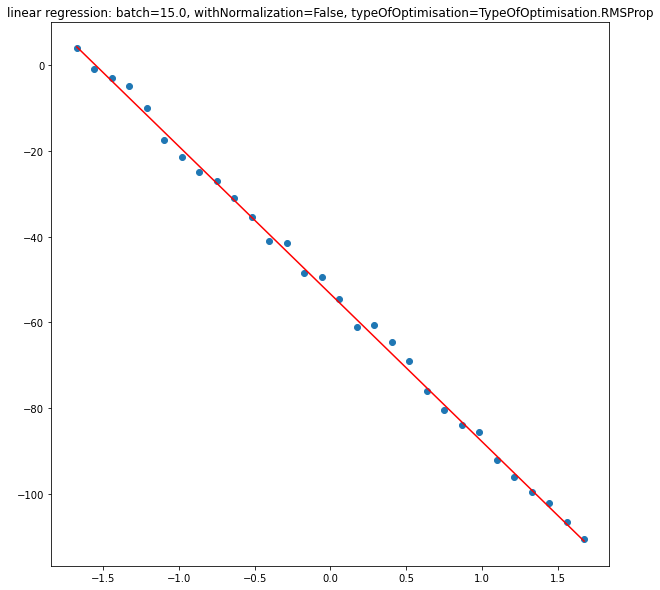

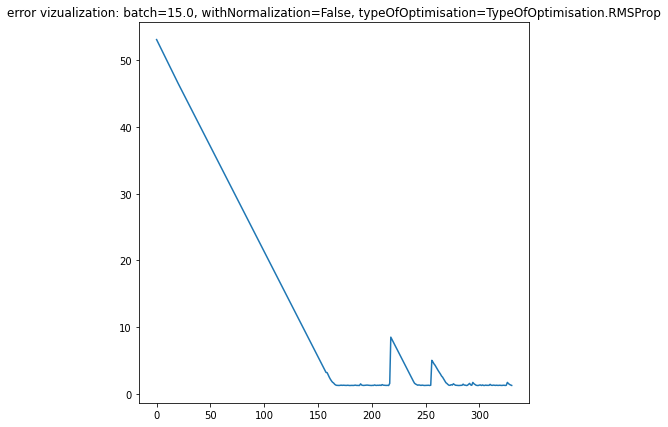

peak memory: 122.64 MiB, increment: 4.10 MiB
batch:                    30
53.10287011635425 1.2816697951383489
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-53.0670439  -34.19712667]
number of iterations:     794
number of calculations:  49290
execution time:  242.01226234436035 ms



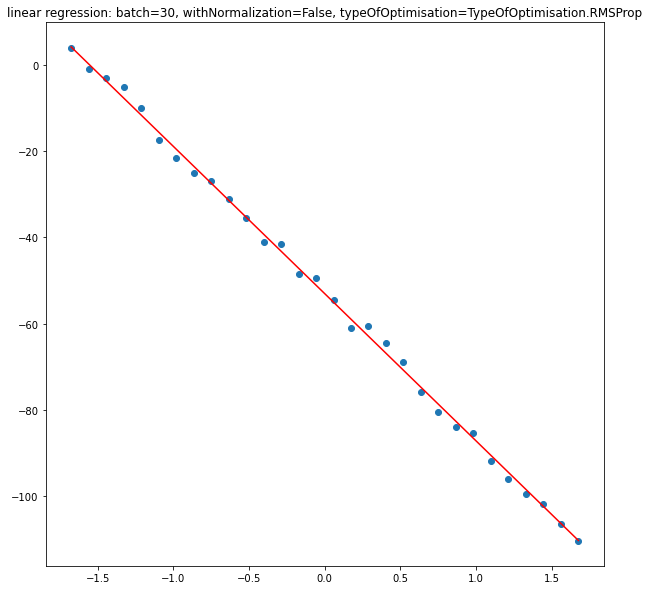

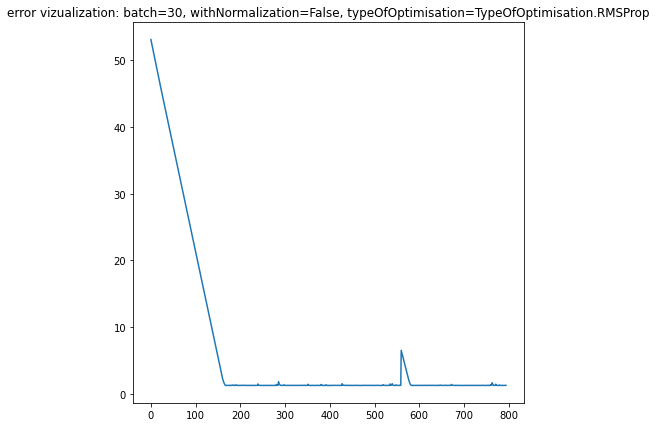

peak memory: 122.73 MiB, increment: 4.18 MiB
with normaliztion: 
batch:                    1
0.7648951768521031 0.03807105054249348
actual coefficients:      [ 1. -1.]
calculated coefficients:  [ 0.00299927 -0.99181323]
number of iterations:     109
number of calculations:  220
execution time:  16.995668411254883 ms



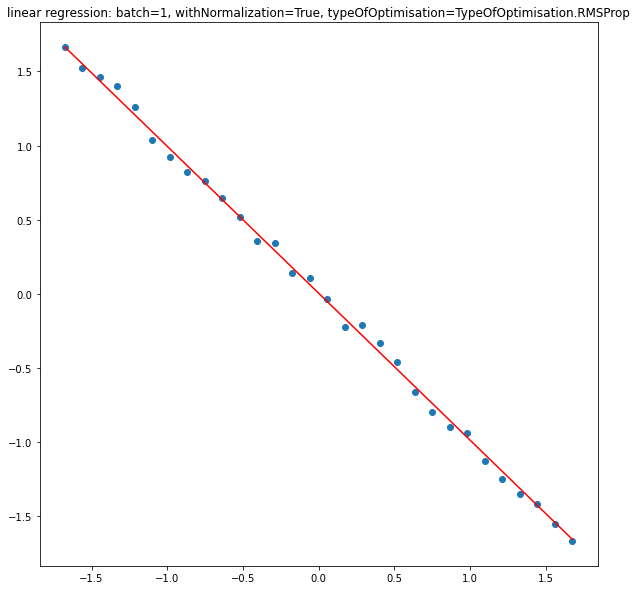

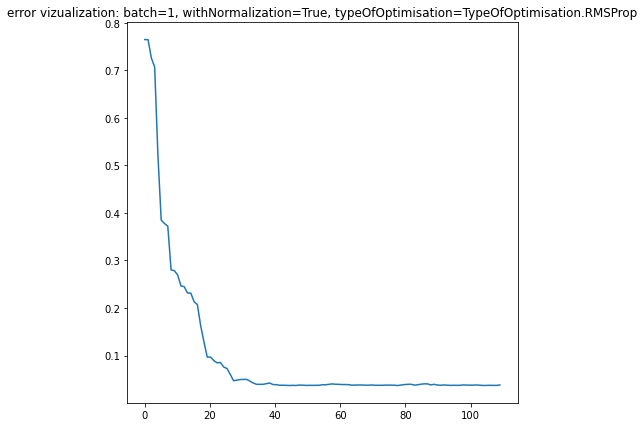

peak memory: 122.71 MiB, increment: 4.04 MiB
batch:                    15.0
0.24269977371323836 0.03933951237197521
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-0.01142571 -0.98639342]
number of iterations:     2241
number of calculations:  67260
execution time:  443.9966678619385 ms



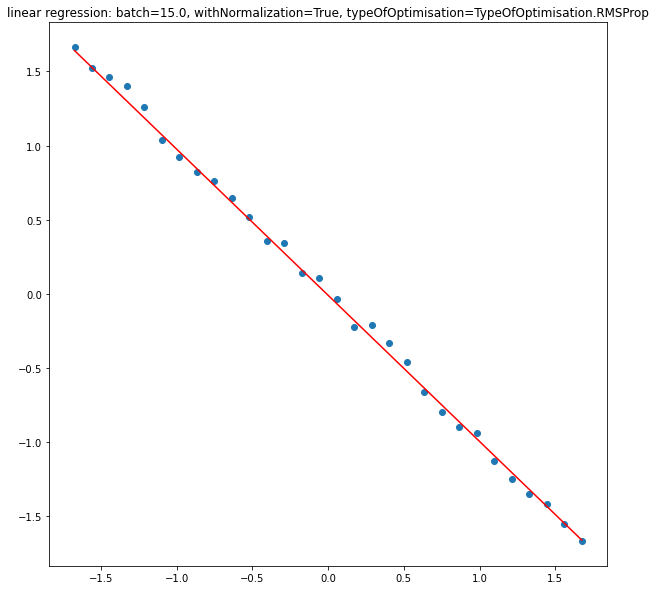

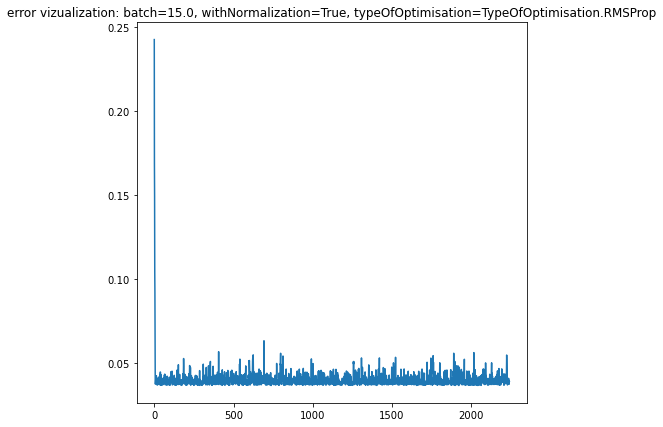

peak memory: 123.94 MiB, increment: 5.33 MiB
batch:                    30
1.7336608258088781 1.0465889729053902e+24
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-4.26549352e+09  1.20782528e+24]
number of iterations:     80
number of calculations:  4834
execution time:  24.964570999145508 ms



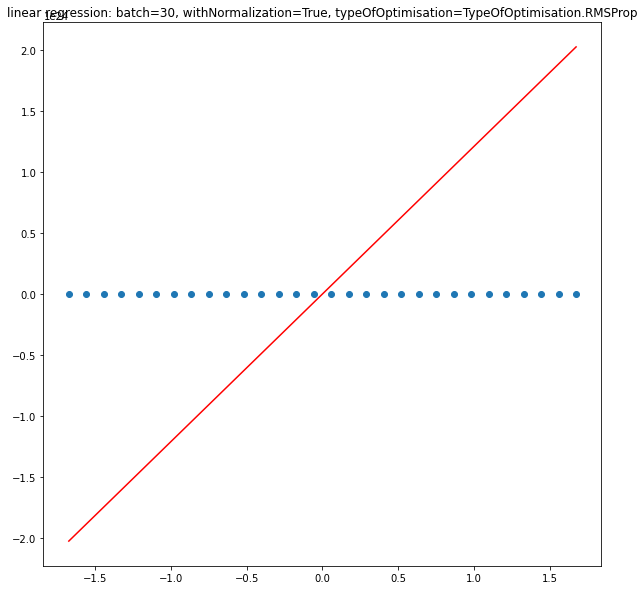

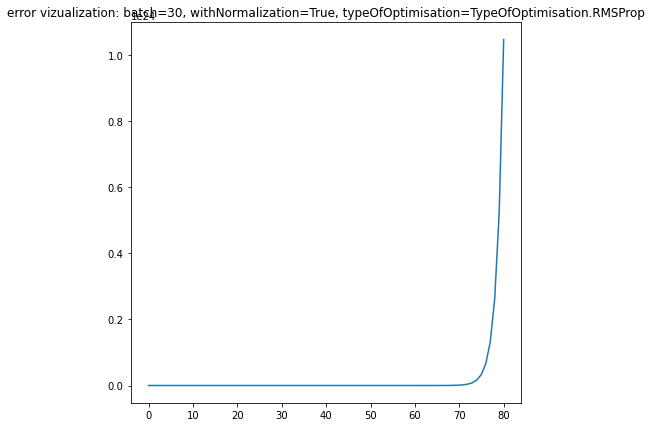

peak memory: 122.91 MiB, increment: 3.69 MiB


In [23]:
print("without normalization: ")
%memit runSGD(1, TypeOfOptimisation.RMSProp, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M / 2, TypeOfOptimisation.RMSProp, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M, TypeOfOptimisation.RMSProp, withNormalization=False, lr=1e-1, eps=1e-4)
print("with normaliztion: ")
%memit runSGD(1, TypeOfOptimisation.RMSProp, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M / 2, TypeOfOptimisation.RMSProp, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M, TypeOfOptimisation.RMSProp, withNormalization=True, lr=1e-1, eps=1e-6)


### Adam

without normalization: 
batch:                    1
53.35116831496329 1.4853416542011908
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-52.5583394  -33.66930592]
number of iterations:     2605
number of calculations:  18242
execution time:  427.0319938659668 ms



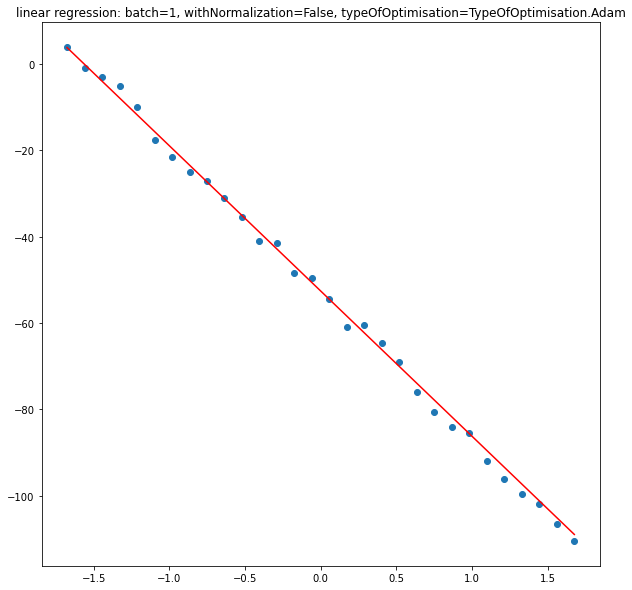

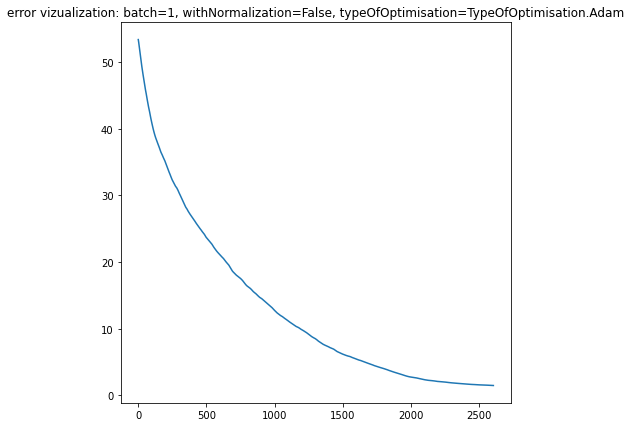

peak memory: 123.89 MiB, increment: 5.20 MiB
batch:                    15.0
53.32883168845959 1.307773071600883
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-52.78613356 -34.2817592 ]
number of iterations:     2210
number of calculations:  77385
execution time:  453.033447265625 ms



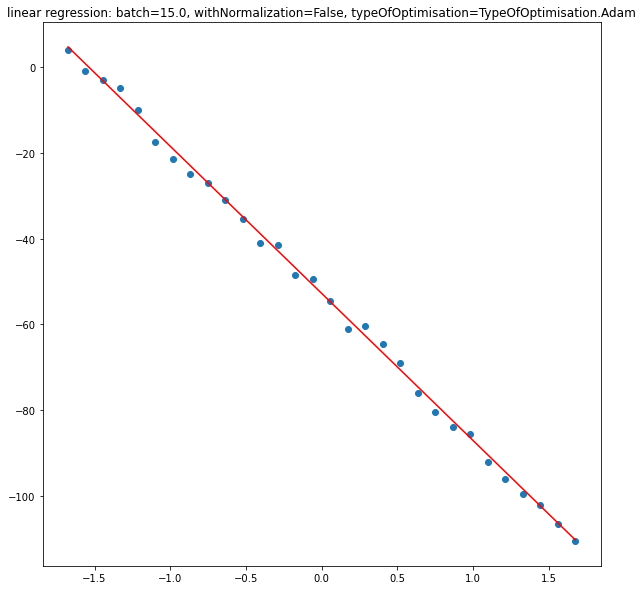

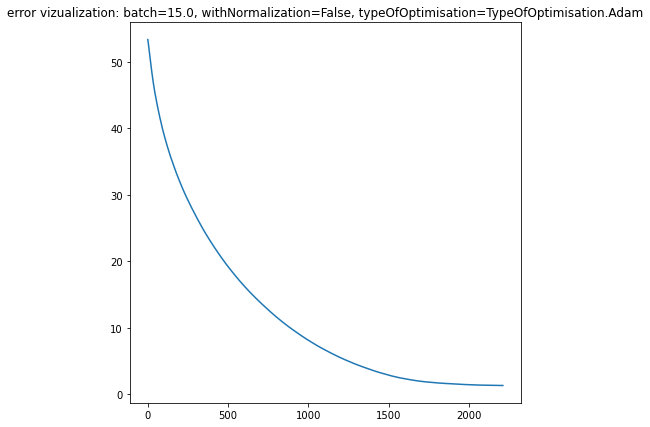

peak memory: 124.06 MiB, increment: 5.16 MiB
batch:                    30
53.32883168845605 1.2832568680376988
actual coefficients:      [ 5. -4.]
calculated coefficients:  [-52.96512313 -34.28662531]
number of iterations:     2385
number of calculations:  155090
execution time:  775.0394344329834 ms



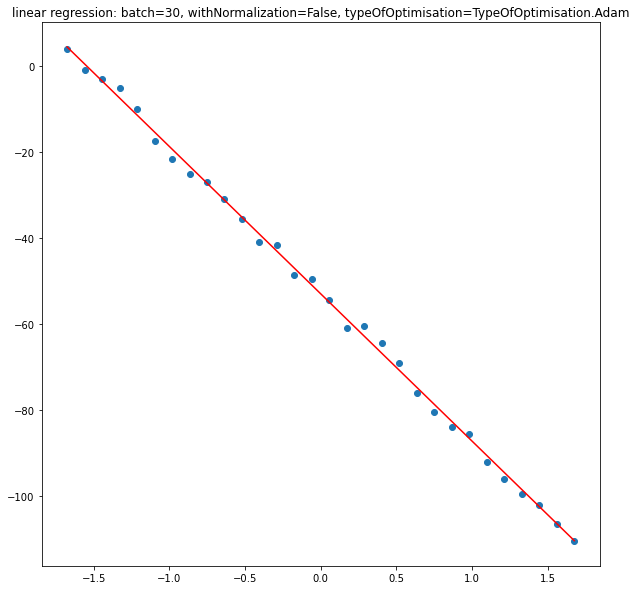

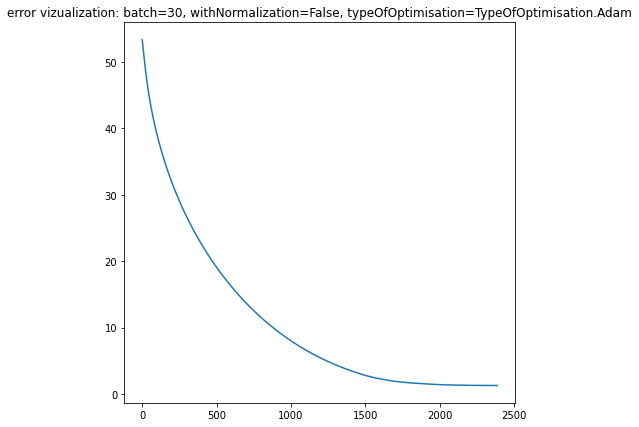

peak memory: 124.52 MiB, increment: 4.93 MiB
with normaliztion: 
batch:                    1
0.8519220657691586 0.03762555490421602
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-0.01113924 -1.00125164]
number of iterations:     1005
number of calculations:  2012
execution time:  159.00254249572754 ms



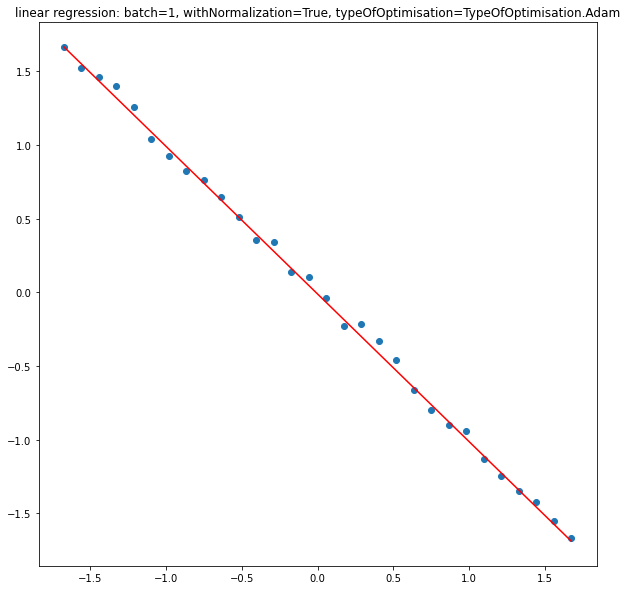

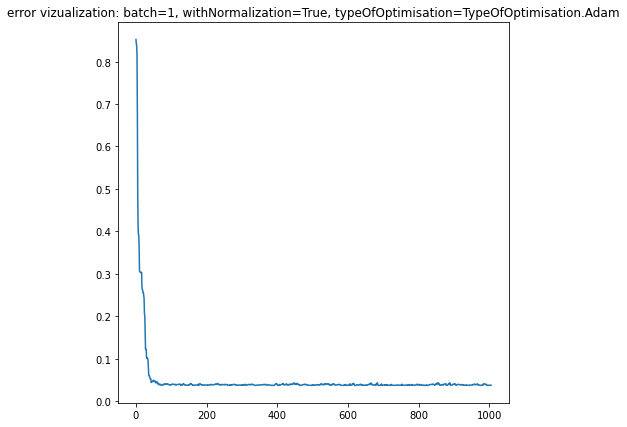

peak memory: 122.85 MiB, increment: 3.73 MiB
batch:                    15.0
0.4708598438424923 0.03796549361987275
actual coefficients:      [ 1. -1.]
calculated coefficients:  [ 0.00947036 -0.99838175]
number of iterations:     2363
number of calculations:  70920
execution time:  464.9651050567627 ms



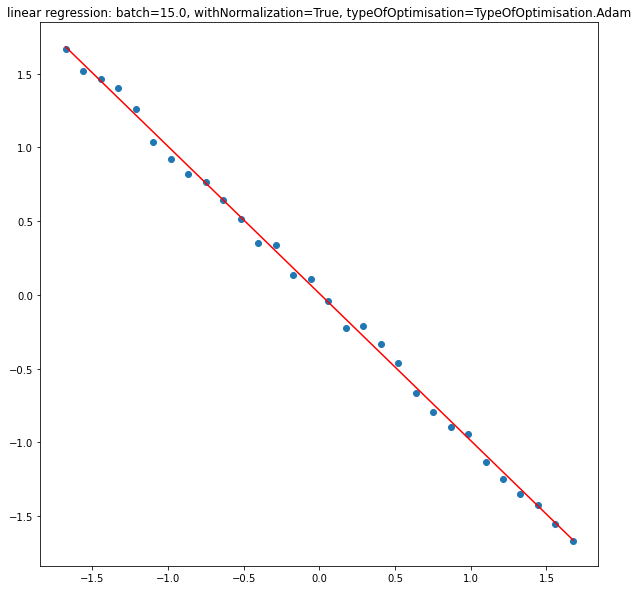

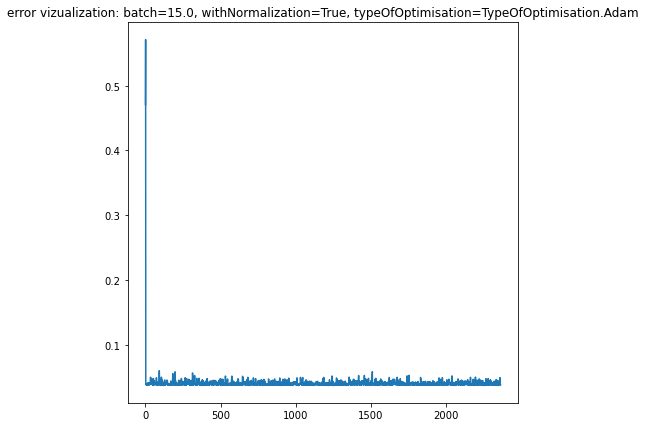

peak memory: 122.89 MiB, increment: 4.10 MiB
batch:                    30
1.7336608258088781 1.0465889729053902e+24
actual coefficients:      [ 1. -1.]
calculated coefficients:  [-3.23704527e+09  1.20782528e+24]
number of iterations:     80
number of calculations:  4834
execution time:  28.999805450439453 ms



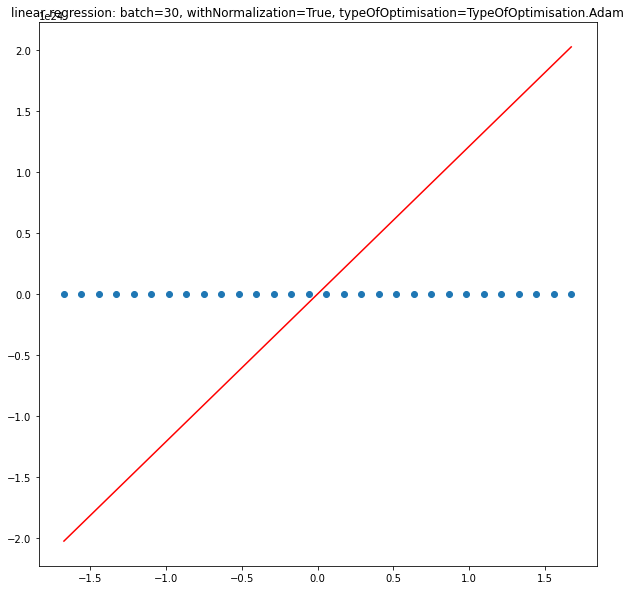

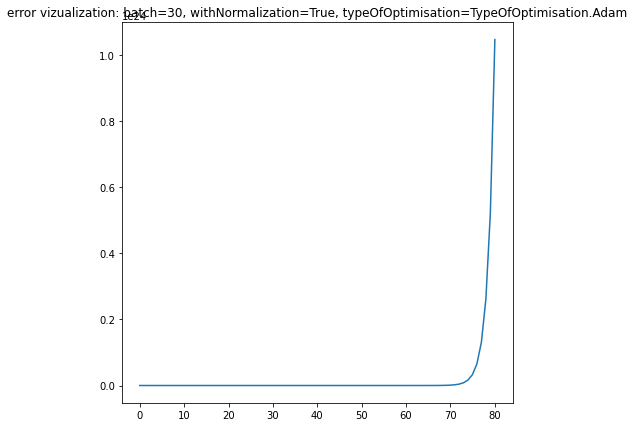

peak memory: 122.99 MiB, increment: 3.41 MiB


In [24]:
print("without normalization: ")
%memit runSGD(1, TypeOfOptimisation.Adam, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M / 2, TypeOfOptimisation.Adam, withNormalization=False, lr=1e-1, eps=1e-4)
%memit runSGD(M, TypeOfOptimisation.Adam, withNormalization=False, lr=1e-1, eps=1e-4)
print("with normaliztion: ")
%memit runSGD(1, TypeOfOptimisation.Adam, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M / 2, TypeOfOptimisation.Adam, withNormalization=True, lr=1e-1, eps=1e-6)
%memit runSGD(M, TypeOfOptimisation.Adam, withNormalization=True, lr=1e-1, eps=1e-6)

